# Credit Card Fraud Detection Classification Project

## Problem Definition

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

We used the [Credit Card Default payment in Taiwan] (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to predict whether the credit card holders are defaulters or Non-defaulters.

# Objective

* Using machine learning algorithms and techniques,we can analyze the features and patterns present in the dataset to train a model that can accurately predict whether a credit card holder is likely to default on their payments or not.
* The dataset contains various attributes or features related to credit card holders, such as demographic information, payment history, bill amounts, and more. By leveraging this data, you can train a classification model that learns patterns and relationships between the features and the target variable (default or non-default), allowing it to make predictions on new, unseen instances.
* This information can be valuable for credit card issuers and financial institutions to take proactive measures, such as offering assistance, adjusting credit limits, or implementing risk management strategies, to mitigate potential losses and manage credit card defaults effectively.

In [348]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [333]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

In [339]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [256]:
# pip install --upgrade scikit-learn

In [257]:
# pip install scikit-learn==0.22

In [258]:
# conda update -c conda-forge scikit-learn

## Data upload

In [259]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [260]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Preprocessing and Visualization

### (1) Data Preprocessing

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

No missing value

In [262]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Insights from Data

* The average amount of credit card is (NT dollar) 167,484. Minimal amount a credit card can receive is (NT dollar)10000 while max value is (NT dollar)1M
* In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior age is 79.
* 22.1% of credit card contracts that will default next month



## Drop ID and Rename target

In [263]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [264]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### Drop repeated Categories:

First, let check which features contain repeated catigories and then drop the repeated one:

In [265]:
ca=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in ca:
    print (i,df[i].unique())

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


### Education Feature

In [266]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

### Marriage Feature

In [267]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [268]:
fil = (df.PAY_0 == -1) | (df.PAY_0 == -2)
df.loc[fil, 'PAY_0'] = 0
df.PAY_0.value_counts()

fil = (df.PAY_2 == -1) | (df.PAY_2 == -2)  
df.loc[fil, 'PAY_2'] = 0
df.PAY_2.value_counts()

fil = (df.PAY_3 == -1) | (df.PAY_3 == -2) 
df.loc[fil, 'PAY_3'] = 0
df.PAY_3.value_counts()

fil = (df.PAY_4 == -1) | (df.PAY_4 == -2)  
df.loc[fil, 'PAY_4'] = 0
df.PAY_4.value_counts()

fil = (df.PAY_5 == -1) | (df.PAY_5 == -2) 
df.loc[fil, 'PAY_5'] = 0
df.PAY_5.value_counts()

fil = (df.PAY_6 == -1) | (df.PAY_6 == -2) 
df.loc[fil, 'PAY_6'] = 0
df.PAY_6.value_counts()

PAY_6
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: count, dtype: int64

### (2) Data Visualization

#### Target Variable

We'll visualize the target column "default" to figure out how imblance (balance) the data is

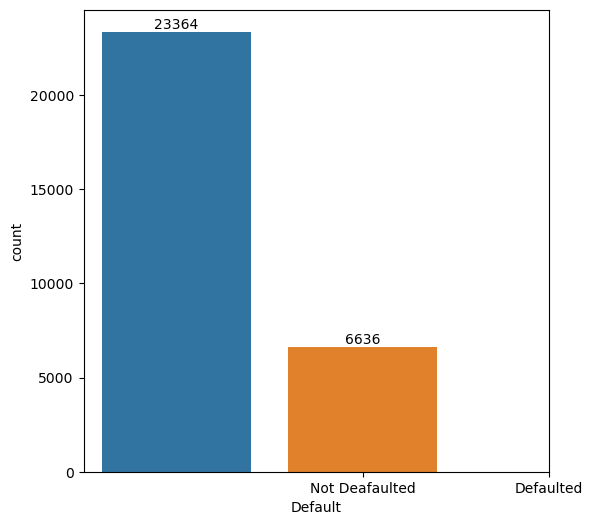

In [269]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2], labels=["Not Deafaulted", "Defaulted"])
plt.show()

The data is quite imbalance which about 22% of clients will default next month.

### SEX Variable

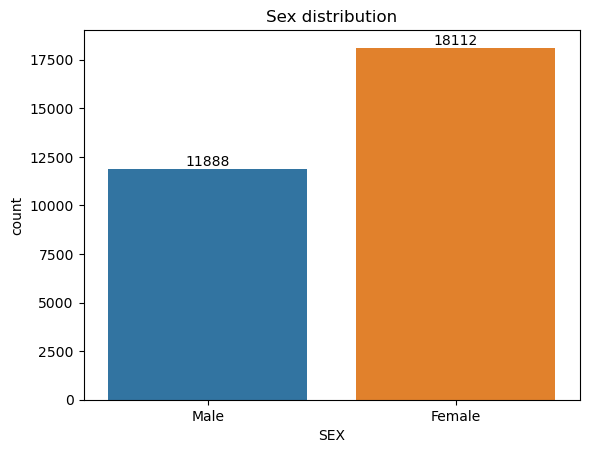

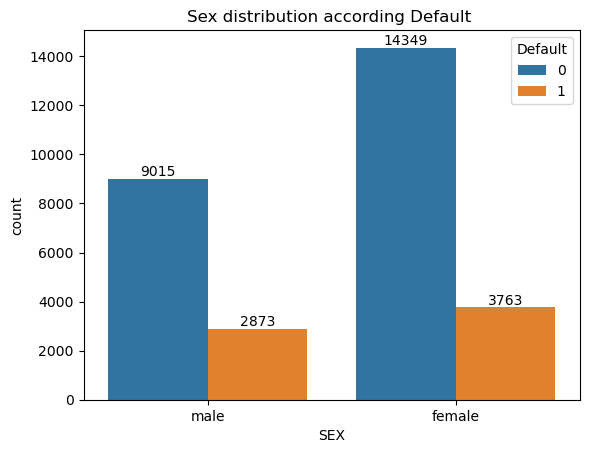

In [270]:
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

* More Female clients own credit card than Male client.
* 24% of male clients fraud credit card while the ratio for female is around 20%

### EDUCATION Variable

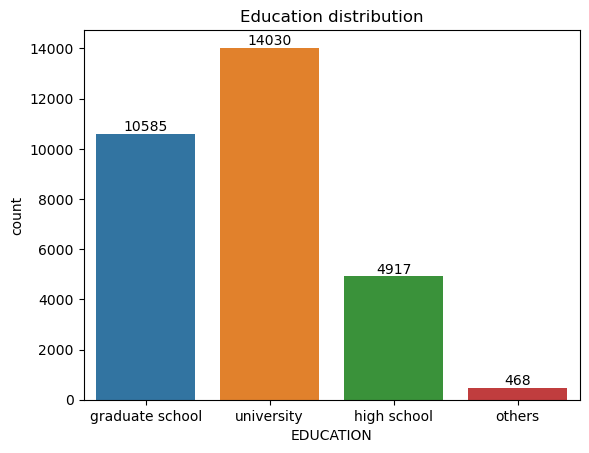

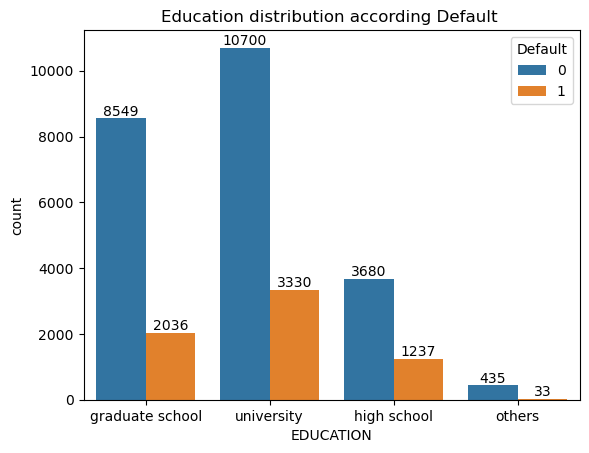

In [271]:
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

* University students are the group which highest number customers using credit cards (47%)
* High school students are the group which has highest fraud cases(25%), follow by university student(23%)

### MARRIAGE Status Variable

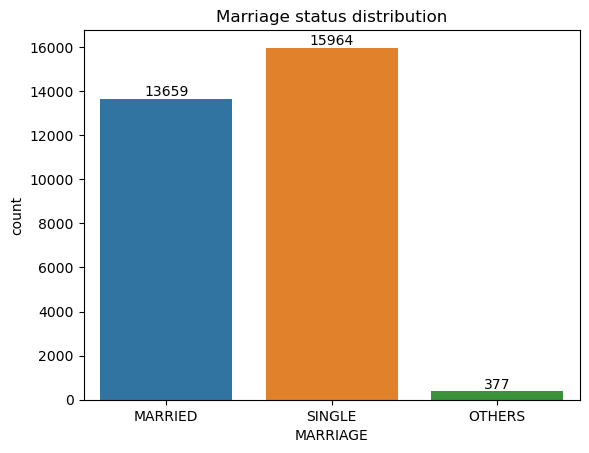

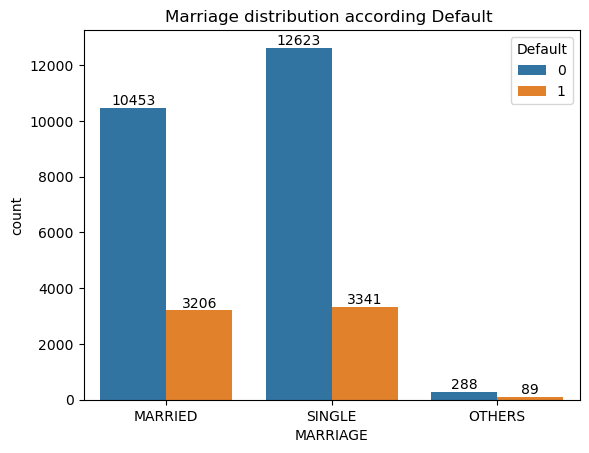

In [272]:
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

* Single is the group which highest number of customers using credit cards (53%)
* Married people are the group which has highest fraud cases(30%)

### AGE Variable

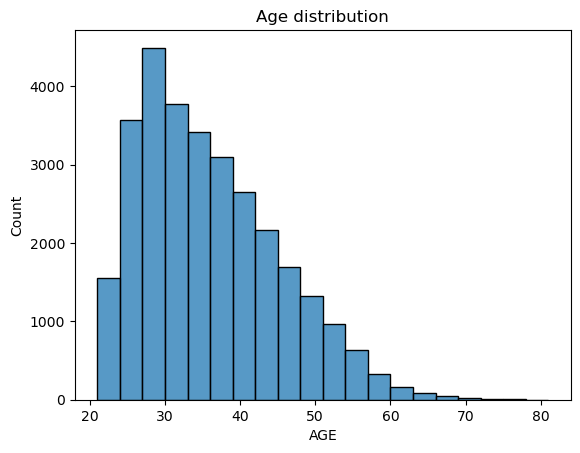

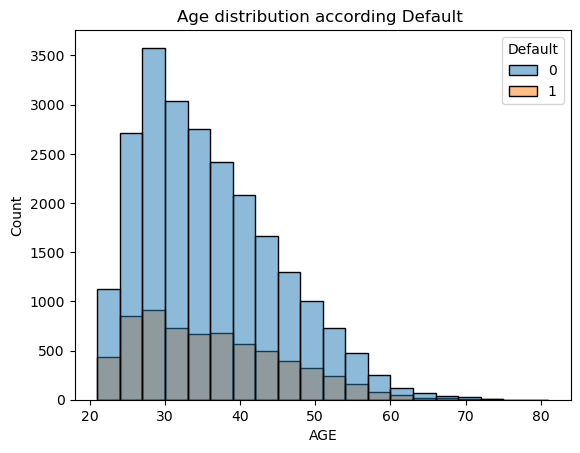

In [273]:
sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

* Histogram is right-skewed meaning the older customers are less likely to use credit cards
* The main client is in their 30s
* Customers in their 30s are also the most prone to credit fraud

### LIMIT_BAL Variable

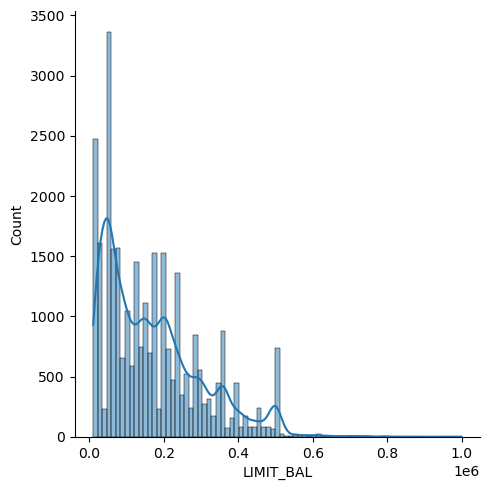

In [274]:
sns.displot(df.LIMIT_BAL, kde=True)

### Amount of bill statement and Amount of previous payment

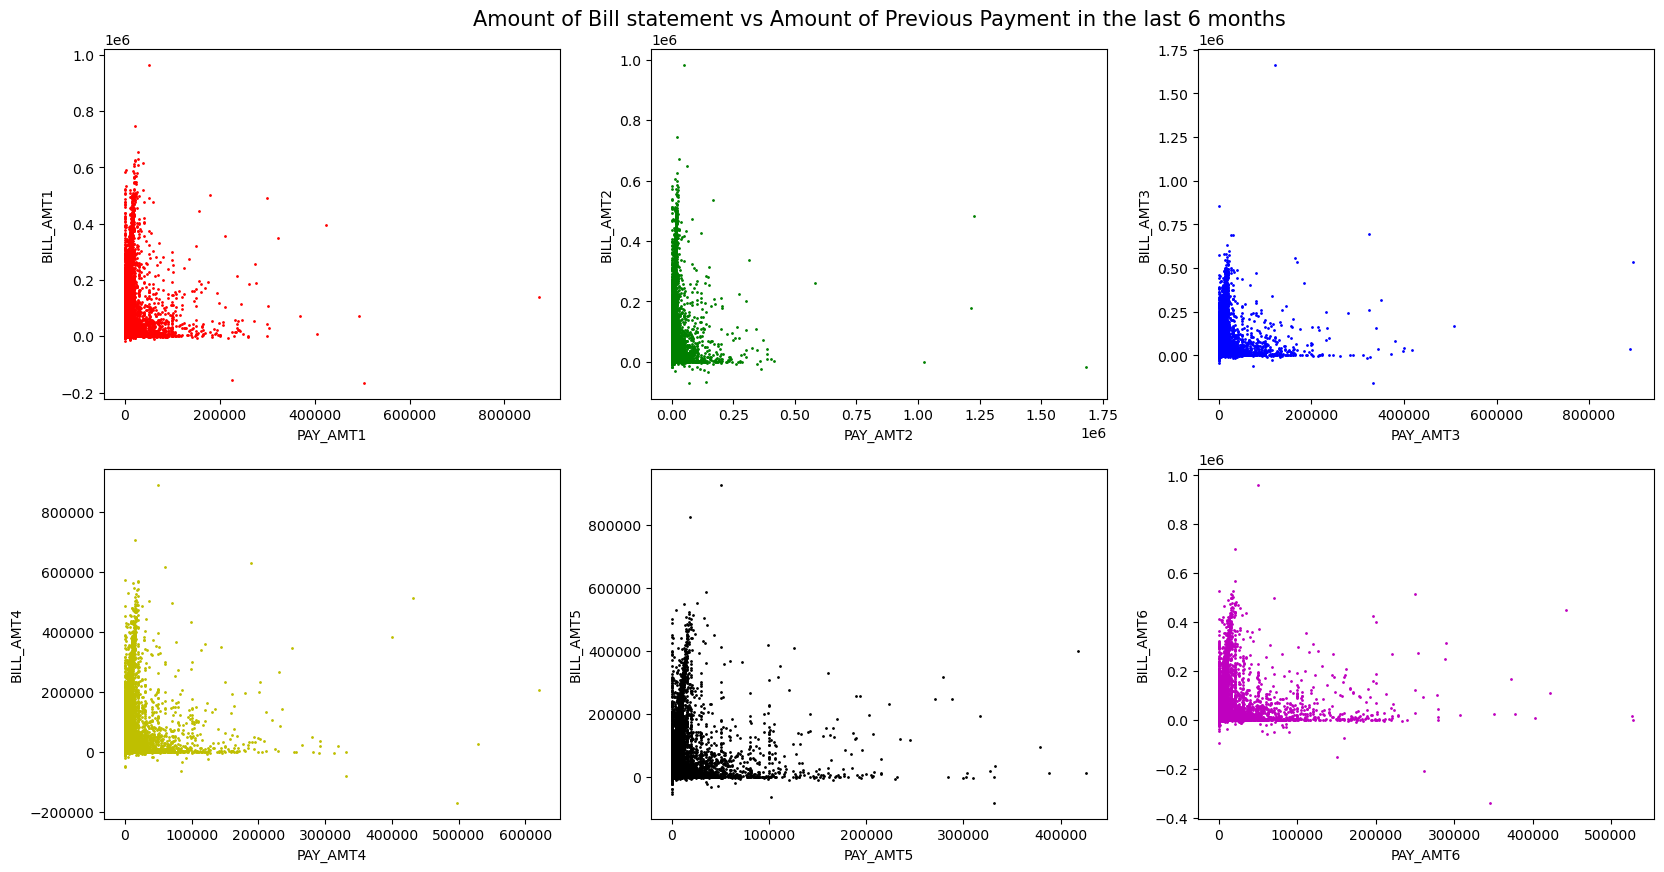

In [275]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Amount of Bill statement vs Amount of Previous Payment in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

## Correlation Analysis

<Axes: >

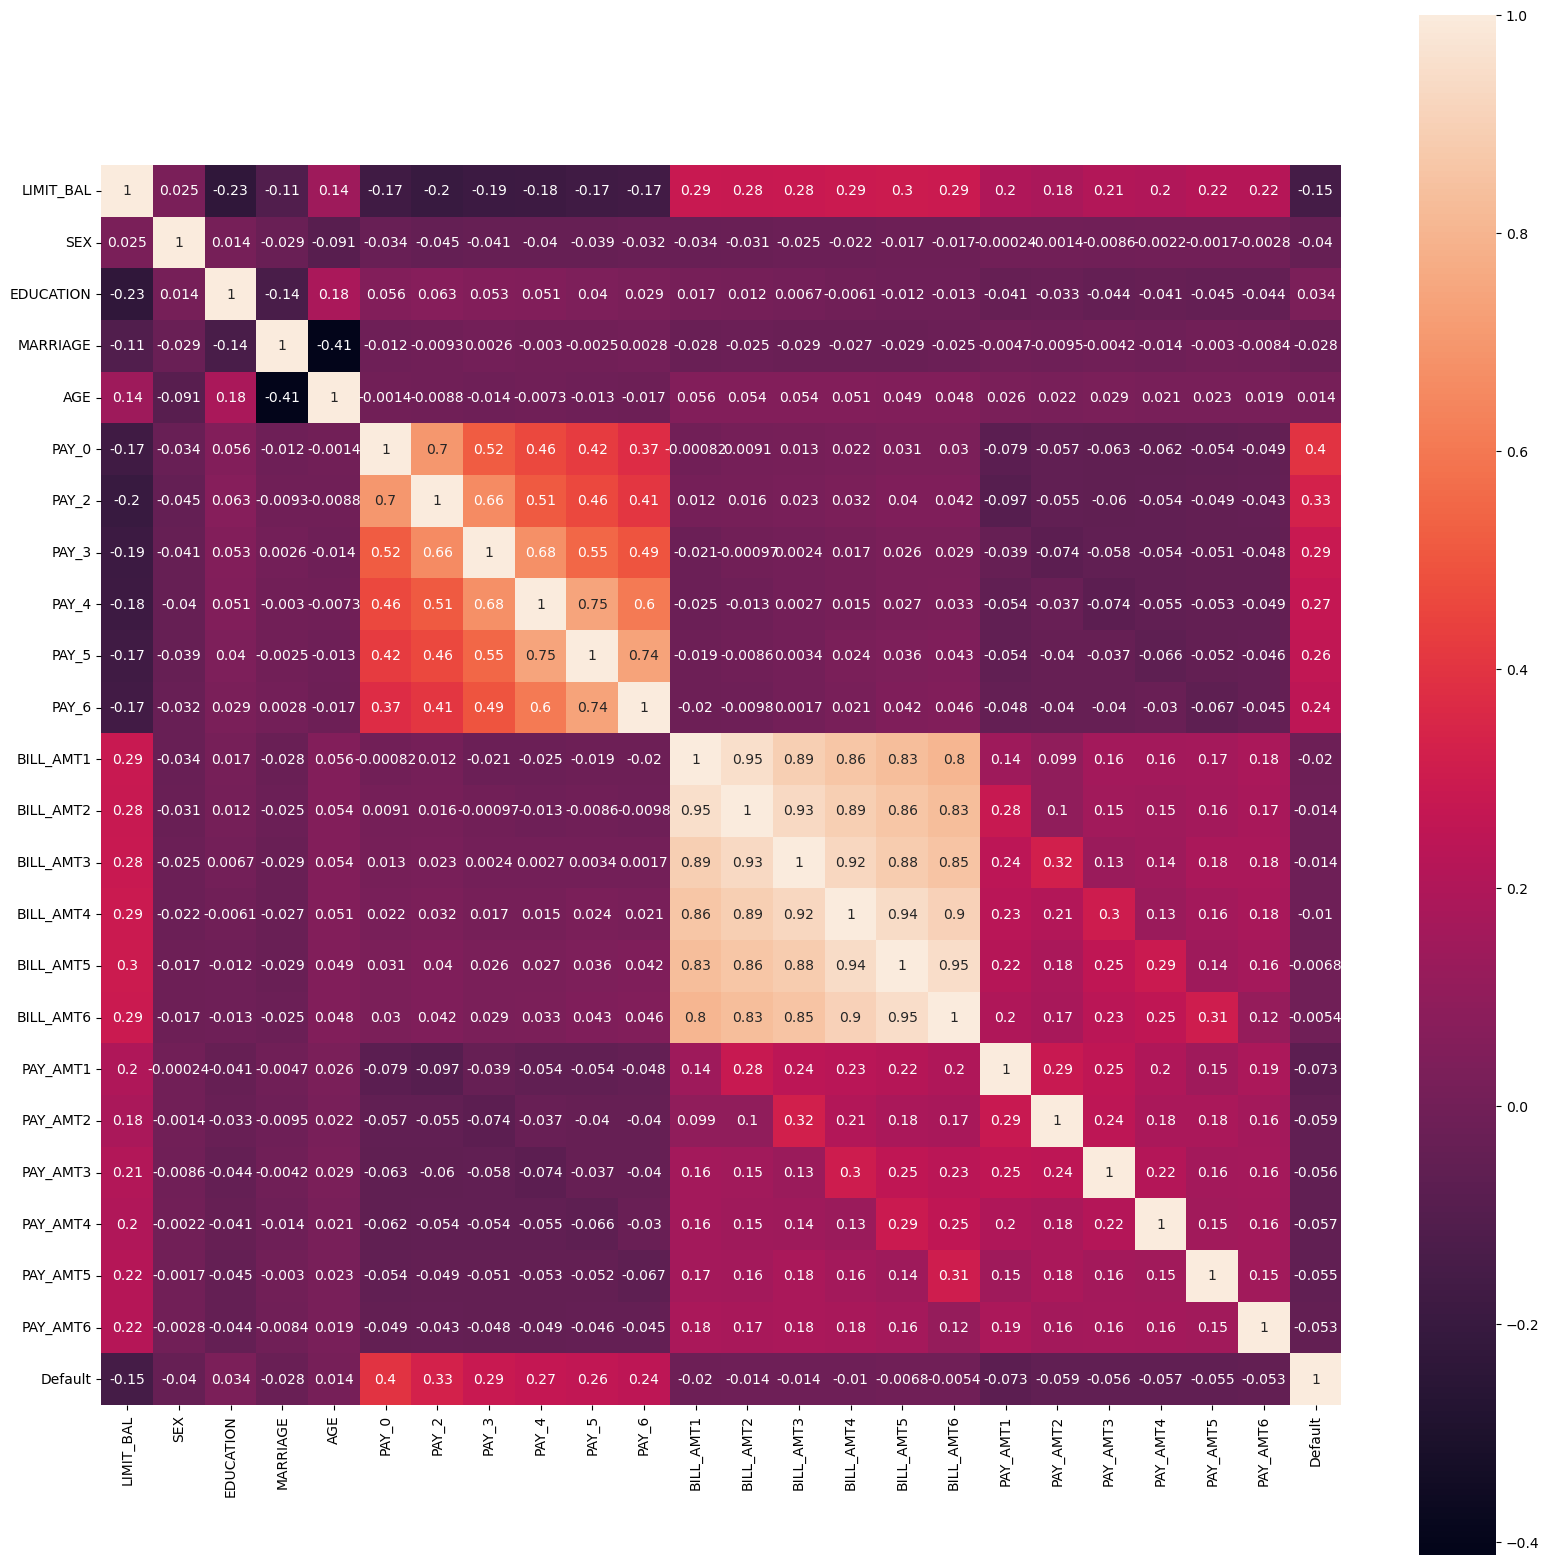

In [276]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

Correlation is high among PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.

# Modelling

In [277]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### Encoding

In [278]:
df1 = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','SEX'],drop_first=True, dtype = int)

### Create target feaure and independent feature:

In [279]:
X = df1.drop(['Default'], axis=1)
y = df1['Default']
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,SEX_2
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,0,1,0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,1,0,0,1,0,1
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,1,0,0,0,0,1
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,1,0,0,0,0,0


### Feature Engineering

In [280]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

### Balancing the Data

Using SMOTE algorithm

In [296]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [297]:
from imblearn.over_sampling import SMOTE

In [298]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))
smote= SMOTE()

X_train,y_train= smote.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


## Building Model

### (1) Logistic Regression

In [299]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [300]:
pred_logit= logit.predict(X_test)
pred_logit

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [340]:
print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

Logit model's accuracy: 0.778
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4687
           1       0.49      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



confusion matrix of logistic regression


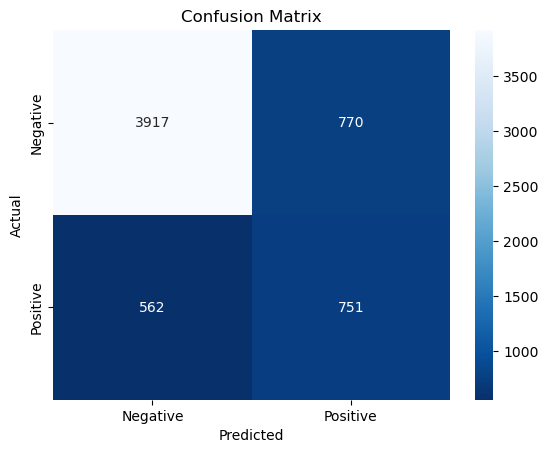

In [345]:
print('confusion matrix of logistic regression')
cm = confusion_matrix(y_test, pred_logit)
sns.heatmap(cm, annot=True, cmap="Blues_r", fmt="d" )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.xticks([0.5, 1.5], ["Negative", "Positive"])
plt.yticks([0.5, 1.5], ["Negative", "Positive"])

plt.show()

### (2) Decision Tree Classifier:

In [304]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, max_features=9, min_samples_leaf=2,
                       random_state=0)

In [305]:
pred_tree = Tree.predict(X_test)


In [341]:
print("Logit model's accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

Logit model's accuracy: 0.739
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4687
           1       0.43      0.61      0.51      1313

    accuracy                           0.74      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.78      0.74      0.75      6000



confusion matrix of logistic regression


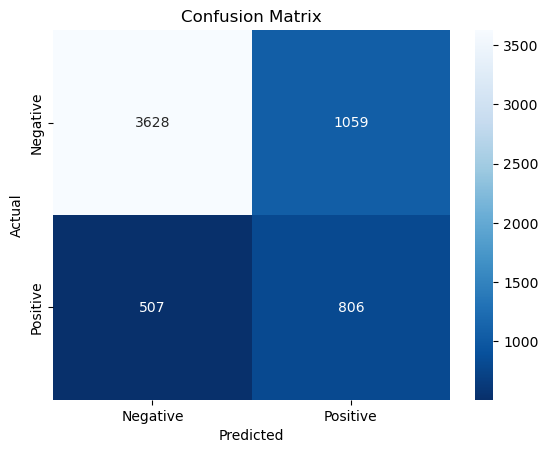

In [346]:
print('confusion matrix of logistic regression')
cm = confusion_matrix(y_test, pred_tree)
sns.heatmap(cm, annot=True, cmap="Blues_r", fmt="d" )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.xticks([0.5, 1.5], ["Negative", "Positive"])
plt.yticks([0.5, 1.5], ["Negative", "Positive"])

plt.show()

### (3) Random Forest Classifier

In [320]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [321]:
pred_rf= rf.predict(X_test)

In [342]:
print("Logit model's accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Logit model's accuracy: 0.7898333333333334
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.52      0.48      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.79      6000



confusion matrix of logistic regression


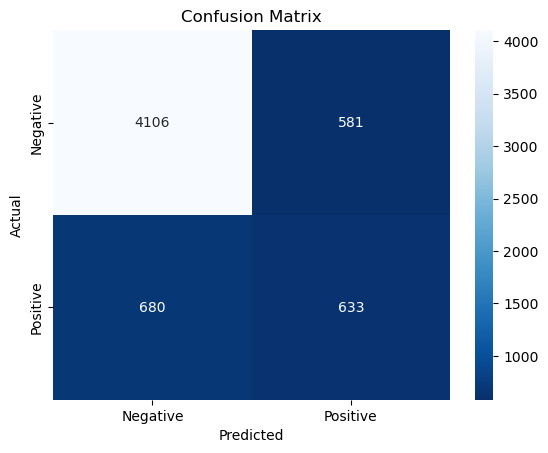

In [347]:
print('confusion matrix of logistic regression')
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, cmap="Blues_r", fmt="d" )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.xticks([0.5, 1.5], ["Negative", "Positive"])
plt.yticks([0.5, 1.5], ["Negative", "Positive"])

plt.show()

## Hyperparameter Tunning

In [384]:
param_grid = {
    'n_estimators': [30, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 6],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4]  # Minimum number of samples required to be at a leaf node
}


In [385]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [30, 50, 100, 200]})

In [386]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [387]:
best_rf_model = RandomForestClassifier(**best_params)

In [388]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [389]:
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.52      0.48      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.79      6000



## Compare Model Performance:

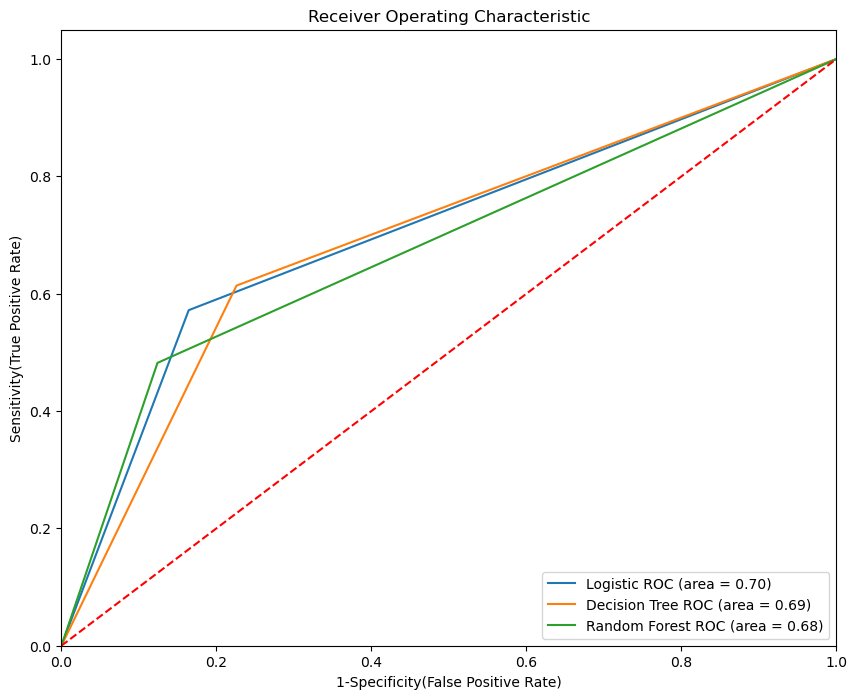

In [392]:
model = [logit, Tree, rf]
models=[pred_logit, pred_tree, pred_rf]
label=['Logistic','Decision Tree','Random Forest']

plt.figure(figsize=(10, 8))
m=np.arange(3)

for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()